<a href="https://colab.research.google.com/github/RoyMukta/Deep-Learning-Assignment_2/blob/main/CNNs_Image_Classification_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Necessary Library

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

# Preprocess

In [ ]:
# Define the transformation: resize CIFAR-10 images to 224x224 and convert to tensors
basic_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [ ]:

# Define the transformation: resize CIFAR-10 images to 224x224 and convert to tensors
basic_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Split data into training and validation set

In [ ]:

# Define transformations: resize images to 224x224 and convert to tensors
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load the CIFAR-10 dataset with training and test splits
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Define the sizes for training and validation splits
train_size = int(0.8 * len(train_data))
val_size = len(train_data) - train_size

# Split the dataset
train_data, val_data = random_split(train_data, [train_size, val_size])

# Create DataLoaders for training, validation, and test sets
train_loader = DataLoader(train_data, batch_size=64, shuffle=True, num_workers=4)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False, num_workers=4)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False, num_workers=4)


100%|██████████| 170M/170M [07:15<00:00, 392kB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


# Load Dataset

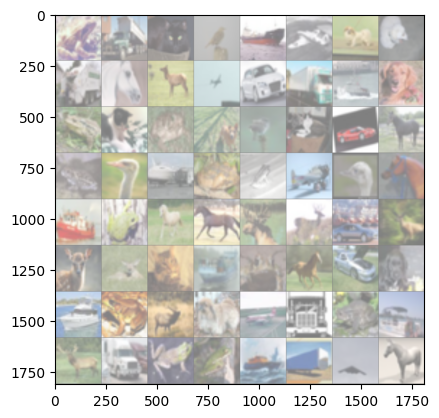

In [ ]:
import numpy as np

# Function to display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize if using normalization
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))


In [ ]:
#Normalization

In [ ]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import torchvision

# Define transformations: resize, convert to tensor, and normalize
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])


In [ ]:
# Load the CIFAR-10 dataset with training and test splits
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Define the sizes for training and validation splits
train_size = int(0.8 * len(train_data))
val_size = len(train_data) - train_size

# Split the dataset
train_data, val_data = random_split(train_data, [train_size, val_size])


In [ ]:
# Create DataLoaders for training, validation, and test sets
train_loader = DataLoader(train_data, batch_size=64, shuffle=True, num_workers=4)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False, num_workers=4)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False, num_workers=4)


# Dataset after Normalization

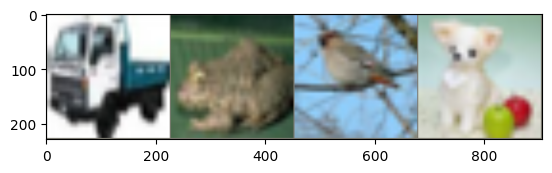

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to unnormalize and display an image
def imshow(img):
    img = img * torch.tensor([0.2023, 0.1994, 0.2010]).view(3, 1, 1) + torch.tensor([0.4914, 0.4822, 0.4465]).view(3, 1, 1)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a few images from the train_loader
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show a few images after unnormalizing
imshow(torchvision.utils.make_grid(images[:4]))


# Train Model

In [ ]:
import torchvision.models as models
import torch.nn as nn # Import the nn module from PyTorch

# Load the ResNet-18 model and modify the final layer for CIFAR-10
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 10)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
import torchvision.models as models
import torch.nn as nn # Import the nn module

# Load the ResNet-18 model and modify the final layer for CIFAR-10
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 10)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [ ]:
!pip install scikit-learn
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split, Subset
from torchvision.datasets import CIFAR10
import torch.optim as optim
from sklearn.model_selection import KFold # Import the KFold class from scikit-learn

# Define loss function
criterion = nn.CrossEntropyLoss()

# Hyperparameters to test
learning_rates = [0.1, 0.01, 0.001]
optimizers = ['SGD', 'Adam']
best_accuracy = 0.0
best_hyperparams = {}

# Set up 5-fold cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Apply Cross-Validation Fold-3

In [ ]:
import torch.nn as nn
from sklearn.model_selection import KFold # Import KFold

# Define loss function
criterion = nn.CrossEntropyLoss()

# Hyperparameters to test
learning_rates = [0.1, 0.01, 0.001]
optimizers = ['SGD', 'Adam']
best_accuracy = 0.0
best_hyperparams = {}

# Set up 5-fold cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

In [ ]:
#Resnet-18 model without L2 and without data augmentation. Code done upto graph training and loss

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from sklearn.model_selection import KFold
import numpy as np
import torchvision.models as models

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transformation: Resize, Convert to Tensor, and Normalize (no data augmentation)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

# Load CIFAR-10 dataset
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Define sizes for training and validation splits (80/20 split)
train_size = int(0.8 * len(train_data))
val_size = len(train_data) - train_size
train_data, val_data = random_split(train_data, [train_size, val_size])

# Define loss function
criterion = nn.CrossEntropyLoss()

# Hyperparameters to test in cross-validation
learning_rates = [0.1, 0.01, 0.001]
optimizers = ['SGD', 'Adam']
best_accuracy = 0.0
best_hyperparams = {}

# Set up 5-fold cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Function to create a new ResNet-18 model instance
def create_model():
    model = models.resnet18(pretrained=False)
    model.fc = nn.Linear(model.fc.in_features, 10)  # CIFAR-10 has 10 classes
    return model.to(device)

# Cross-validation to find the best hyperparameters
for lr in learning_rates:
    for opt_name in optimizers:
        fold_accuracies = []

        # 3-fold cross-validation
        for train_idx, val_idx in kf.split(train_data):
            # Create data loaders for the current fold
            train_fold = torch.utils.data.Subset(train_data, train_idx)
            val_fold = torch.utils.data.Subset(train_data, val_idx)
            train_loader = DataLoader(train_fold, batch_size=64, shuffle=True, num_workers=4)
            val_loader = DataLoader(val_fold, batch_size=64, shuffle=False, num_workers=4)

            # Initialize the model and optimizer for each fold
            model = create_model()
            optimizer = optim.SGD(model.parameters(), lr=lr) if opt_name == 'SGD' else optim.Adam(model.parameters(), lr=lr)

            # Train for 5 epochs and track training and validation accuracy
            for epoch in range(5):
                model.train()
                running_loss = 0.0
                correct_train = 0
                total_train = 0

                for inputs, labels in train_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    optimizer.zero_grad()
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    loss.backward()
                    optimizer.step()
                    running_loss += loss.item()

                    # Track training accuracy
                    _, predicted = torch.max(outputs.data, 1)
                    total_train += labels.size(0)
                    correct_train += (predicted == labels).sum().item()

                train_accuracy = 100 * correct_train / total_train
                print(f"Epoch {epoch+1}, Training Loss: {running_loss/len(train_loader):.4f}, Training Accuracy: {train_accuracy:.2f}%")

                # Validate the model
                model.eval()
                correct_val = 0
                total_val = 0
                with torch.no_grad():
                    for inputs, labels in val_loader:
                        inputs, labels = inputs.to(device), labels.to(device)
                        outputs = model(inputs)
                        _, predicted = torch.max(outputs.data, 1)
                        total_val += labels.size(0)
                        correct_val += (predicted == labels).sum().item()

                val_accuracy = 100 * correct_val / total_val
                print(f"Epoch {epoch+1}, Validation Accuracy: {val_accuracy:.2f}%")

            # Calculate fold accuracy and add it to the list of accuracies for the current hyperparameters
            fold_accuracies.append(val_accuracy)

        # Average accuracy across folds
        avg_accuracy = np.mean(fold_accuracies)

        # Check if this is the best hyperparameter combination so far
        if avg_accuracy > best_accuracy:
            best_accuracy = avg_accuracy
            best_hyperparams = {'learning_rate': lr, 'optimizer': opt_name}
            print(f"New best hyperparameters: {best_hyperparams} with accuracy: {best_accuracy:.2f}%")

print(f"Best hyperparameters found: {best_hyperparams} with accuracy: {best_accuracy:.2f}%")

# Set up DataLoader for the full training and validation sets
train_loader = DataLoader(train_data, batch_size=64, shuffle=True, num_workers=4)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False, num_workers=4)

# Reinitialize the model with the best hyperparameters
model = create_model()
lr = best_hyperparams['learning_rate']
if best_hyperparams['optimizer'] == 'SGD':
    optimizer = optim.SGD(model.parameters(), lr=lr)
else:
    optimizer = optim.Adam(model.parameters(), lr=lr)

# Train the model on the full training set for 5 epochs
for epoch in range(5):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Track training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}, Training Accuracy: {train_accuracy:.2f}%")

# Validate the model on the validation set
model.eval()
correct_val = 0
total_val = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_val += labels.size(0)
        correct_val += (predicted == labels).sum().item()

validation_accuracy = 100 * correct_val / total_val
print(f"Final Validation Accuracy: {validation_accuracy:.2f}%")

# Save the trained model
torch.save(model.state_dict(), 'resnet18_best_model.pth')
print("Model saved as 'resnet18_best_model.pth'")



Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1, Training Loss: 1.8390, Training Accuracy: 33.54%
Epoch 1, Validation Accuracy: 39.08%
Epoch 2, Training Loss: 1.3257, Training Accuracy: 50.77%
Epoch 2, Validation Accuracy: 42.91%
Epoch 3, Training Loss: 1.0523, Training Accuracy: 61.61%
Epoch 3, Validation Accuracy: 62.28%
Epoch 4, Training Loss: 0.8556, Training Accuracy: 69.44%
Epoch 4, Validation Accuracy: 64.58%
Epoch 5, Training Loss: 0.6884, Training Accuracy: 75.68%
Epoch 5, Validation Accuracy: 69.13%
Epoch 1, Training Loss: 1.8511, Training Accuracy: 33.07%
Epoch 1, Validation Accuracy: 39.54%
Epoch 2, Training Loss: 1.3518, Training Accuracy: 49.96%
Epoch 2, Validation Accuracy: 50.75%
Epoch 3, Training Loss: 1.0828, Training Accuracy: 60.75%
Epoch 3, Validation Accuracy: 50.93%
Epoch 4, Training Loss: 0.8832, Training Accuracy: 68.61%
Epoch 4, Validation Accuracy: 65.33%
Epoch 5, Training Loss: 0.7249, Training Accuracy: 74.20%
Epoch 5, Validation Accuracy: 62.59%
Epoch 1, Training Loss: 1.8462, Training Accuracy:

#Testing Accuracy

In [ ]:
#Testing accuracy

In [ ]:
# Load the saved model weights
model.load_state_dict(torch.load('resnet18_best_model.pth'))  # Adjust the path if your model file has a different name
model.eval()  # Set the model to evaluation mode

# Evaluate the model on the test set
correct = 0
total = 0

# Disable gradient calculations for testing
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate and print the accuracy on the test set
test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")


<ipython-input-17-46990c23e4bc>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('resnet18_best_model.pth'))  # Adjust the path if your mode

Test Accuracy: 79.12%


#Training accuracy/validation accuracy, training loss/validation accuracy loss curves to show how you choose the best hyper-parameter.

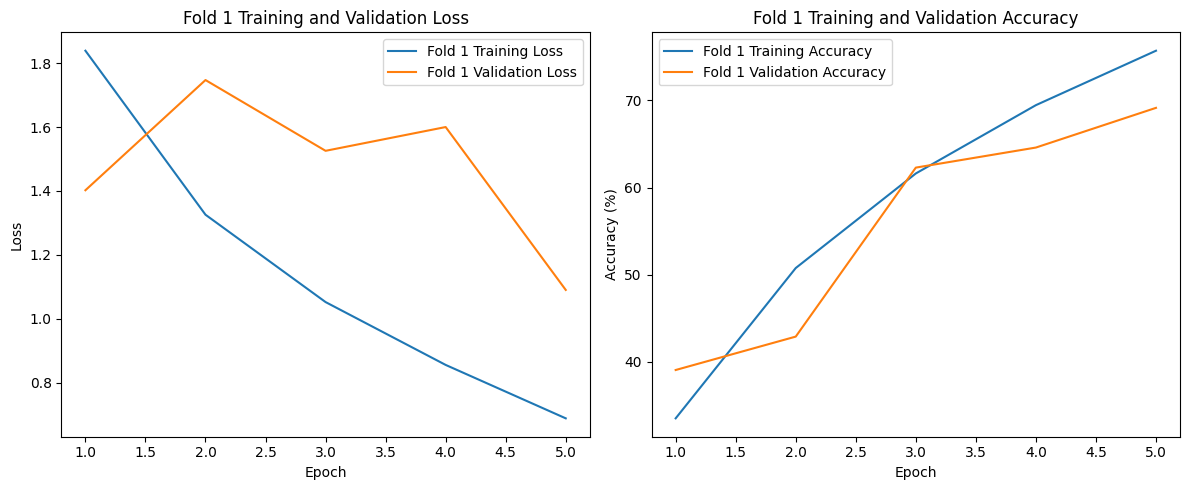

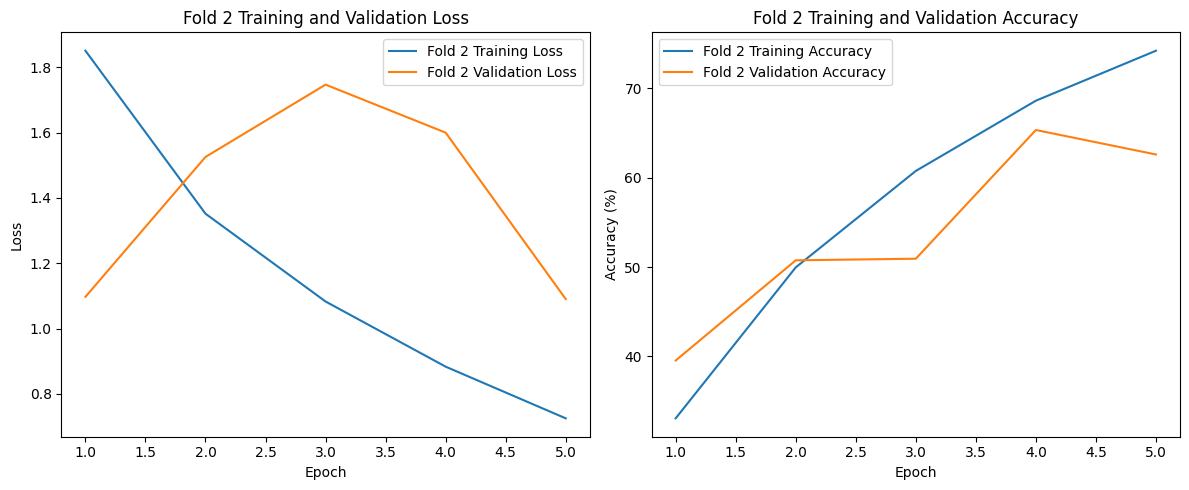

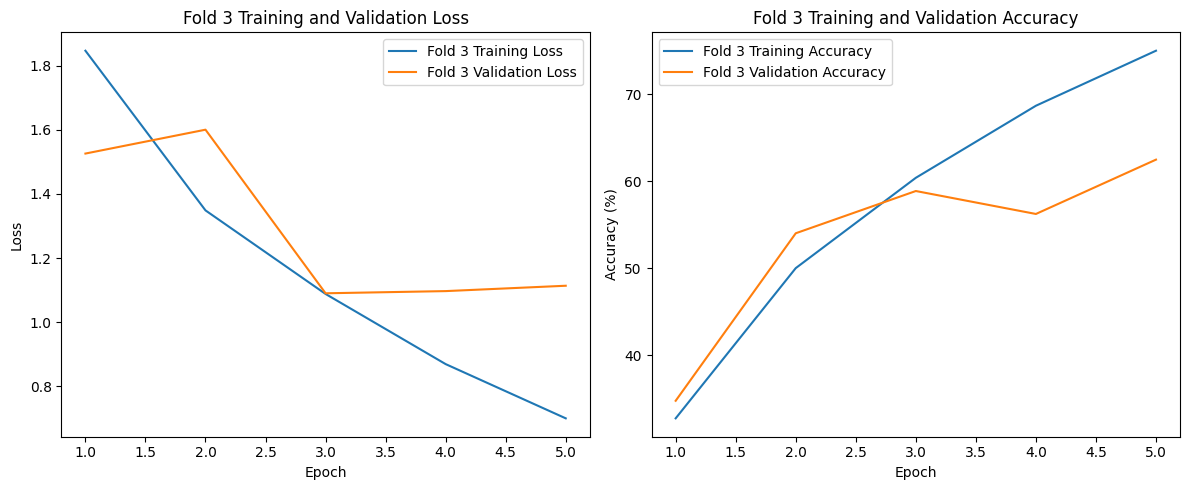

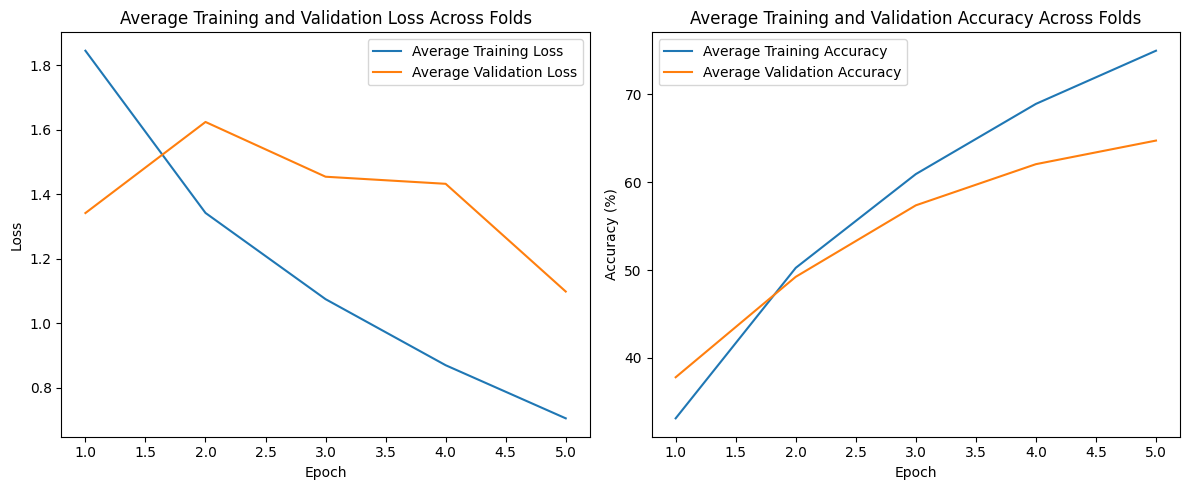

In [ ]:
import matplotlib.pyplot as plt

# Value
train_losses_fold1 = [1.8390, 1.3257, 1.0523, 0.8556, 0.6884]
val_losses_fold1 = [1.4023, 1.7472, 1.5257, 1.6001, 1.0903]
train_accuracies_fold1 = [33.54, 50.77, 61.61, 69.44, 75.68]
val_accuracies_fold1 = [39.08, 42.91, 62.28, 64.58, 69.13]

train_losses_fold2 = [1.8511, 1.3518, 1.0828, 0.8832, 0.7249]
val_losses_fold2 = [1.0971, 1.5257, 1.7472, 1.6001, 1.0903]
train_accuracies_fold2 = [33.07, 49.96, 60.75, 68.61, 74.20]
val_accuracies_fold2 = [39.54, 50.75, 50.93, 65.33, 62.59]

train_losses_fold3 = [1.8462, 1.3486, 1.0882, 0.8696, 0.7006]
val_losses_fold3 = [1.5257, 1.6001, 1.0903, 1.0971, 1.1138]
train_accuracies_fold3 = [32.74, 50.02, 60.41, 68.70, 75.03]
val_accuracies_fold3 = [34.76, 54.03, 58.89, 56.25, 62.50]

# Number of epochs
num_epochs = len(train_losses_fold1)

# Combine folds into lists
train_losses = [train_losses_fold1, train_losses_fold2, train_losses_fold3]
val_losses = [val_losses_fold1, val_losses_fold2, val_losses_fold3]
train_accuracies = [train_accuracies_fold1, train_accuracies_fold2, train_accuracies_fold3]
val_accuracies = [val_accuracies_fold1, val_accuracies_fold2, val_accuracies_fold3]

# Calculate average losses and accuracies across folds
avg_train_losses = [sum(epoch_losses) / 3 for epoch_losses in zip(*train_losses)]
avg_val_losses = [sum(epoch_losses) / 3 for epoch_losses in zip(*val_losses)]
avg_train_accuracies = [sum(epoch_accuracies) / 3 for epoch_accuracies in zip(*train_accuracies)]
avg_val_accuracies = [sum(epoch_accuracies) / 3 for epoch_accuracies in zip(*val_accuracies)]

# Plot each fold's training and validation loss/accuracy
for i in range(3):
    plt.figure(figsize=(12, 5))

    # Loss plot for each fold
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses[i], label=f'Fold {i+1} Training Loss')
    plt.plot(range(1, num_epochs + 1), val_losses[i], label=f'Fold {i+1} Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Fold {i+1} Training and Validation Loss')
    plt.legend()

    # Accuracy plot for each fold
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_accuracies[i], label=f'Fold {i+1} Training Accuracy')
    plt.plot(range(1, num_epochs + 1), val_accuracies[i], label=f'Fold {i+1} Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title(f'Fold {i+1} Training and Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot average training and validation loss/accuracy across all folds
plt.figure(figsize=(12, 5))

# Average Loss plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), avg_train_losses, label='Average Training Loss')
plt.plot(range(1, num_epochs + 1), avg_val_losses, label='Average Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Average Training and Validation Loss Across Folds')
plt.legend()

# Average Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), avg_train_accuracies, label='Average Training Accuracy')
plt.plot(range(1, num_epochs + 1), avg_val_accuracies, label='Average Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Average Training and Validation Accuracy Across Folds')
plt.legend()

plt.tight_layout()
plt.show()


#Resnet-18 with l2 without data augmentation

In [ ]:
# Function to create a new ResNet-18 model instance
def create_model():
    model = models.resnet18(pretrained=False)
    model.fc = nn.Linear(model.fc.in_features, 10)  # CIFAR-10 has 10 classes
    return model.to(device)

# Hyperparameters to test in cross-validation
learning_rates = [0.1, 0.01, 0.001]
optimizers = ['SGD', 'Adam']
weight_decays = [0, 0.0001, 0.001]  # L2 regularization values # Added weight_decays definition
best_accuracy = 0.0
best_hyperparams = {}

# Cross-validation to find the best hyperparameters
for lr in learning_rates:
    for opt_name in optimizers:
        for wd in weight_decays:
            fold_accuracies = []

            # 5-fold cross-validation
            for train_idx, val_idx in kf.split(train_data):
                # Create data loaders for the current fold
                train_fold = torch.utils.data.Subset(train_data, train_idx)
                val_fold = torch.utils.data.Subset(train_data, val_idx)
                train_loader = DataLoader(train_fold, batch_size=64, shuffle=True, num_workers=4)
                val_loader = DataLoader(val_fold, batch_size=64, shuffle=False, num_workers=4)

                # Initialize the model and optimizer for each fold
                model = create_model()
                if opt_name == 'SGD':
                    optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=wd)
                else:
                    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=wd)

                # Train for 5 epochs and track training and validation accuracy
                for epoch in range(5):
                    model.train()
                    running_loss = 0.0
                    correct_train = 0
                    total_train = 0

                    for inputs, labels in train_loader:
                        inputs, labels = inputs.to(device), labels.to(device)
                        optimizer.zero_grad()
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)
                        loss.backward()
                        optimizer.step()
                        running_loss += loss.item()

                        # Track training accuracy
                        _, predicted = torch.max(outputs.data, 1)
                        total_train += labels.size(0)
                        correct_train += (predicted == labels).sum().item()

                    train_accuracy = 100 * correct_train / total_train
                    print(f"Epoch {epoch+1}, Training Loss: {running_loss/len(train_loader):.4f}, Training Accuracy: {train_accuracy:.2f}%")

                    # Validate the model
                    model.eval()
                    correct_val = 0
                    total_val = 0
                    with torch.no_grad():
                        for inputs, labels in val_loader:
                            inputs, labels = inputs.to(device), labels.to(device)
                            outputs = model(inputs)
                            _, predicted = torch.max(outputs.data, 1)
                            total_val += labels.size(0)
                            correct_val += (predicted == labels).sum().item()

                    val_accuracy = 100 * correct_val / total_val
                    print(f"Epoch {epoch+1}, Validation Accuracy: {val_accuracy:.2f}%")

                # Calculate fold accuracy and add it to the list of accuracies for the current hyperparameters
                fold_accuracies.append(val_accuracy)

            # Average accuracy across folds
            avg_accuracy = np.mean(fold_accuracies)

            # Check if this is the best hyperparameter combination so far
            if avg_accuracy > best_accuracy:
                best_accuracy = avg_accuracy
                best_hyperparams = {'learning_rate': lr, 'optimizer': opt_name, 'weight_decay': wd}
                print(f"New best hyperparameters: {best_hyperparams} with accuracy: {best_accuracy:.2f}%")

print(f"Best hyperparameters found: {best_hyperparams} with accuracy: {best_accuracy:.2f}%")

# Set up DataLoader for the full training and validation sets
train_loader = DataLoader(train_data, batch_size=64, shuffle=True, num_workers=4)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False, num_workers=4)

# Reinitialize the model with the best hyperparameters
model = create_model()
lr = best_hyperparams['learning_rate']
wd = best_hyperparams['weight_decay']
if best_hyperparams['optimizer'] == 'SGD':
    optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=wd)
else:
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=wd)

# Train the model on the full training set for 5 epochs
for epoch in range(5):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Track training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}, Training Accuracy: {train_accuracy:.2f}%")

# Validate the model on the validation set
model.eval()
correct_val = 0
total_val = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_val += labels.size(0)
        correct_val += (predicted == labels).sum().item()

validation_accuracy = 100 * correct_val / total_val
print(f"Final Validation Accuracy: {validation_accuracy:.2f}%")

# Save the trained model
torch.save(model.state_dict(), 'resnet18_best_model_with_l2.pth')
print("Model saved as 'resnet18_best_model_with_l2.pth'")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1, Training Loss: 1.8071, Training Accuracy: 34.12%
Epoch 1, Validation Accuracy: 40.62%
Epoch 2, Training Loss: 1.3120, Training Accuracy: 51.35%
Epoch 2, Validation Accuracy: 44.17%
Epoch 3, Training Loss: 1.0555, Training Accuracy: 61.60%
Epoch 3, Validation Accuracy: 62.95%
Epoch 4, Training Loss: 0.8506, Training Accuracy: 69.37%
Epoch 4, Validation Accuracy: 52.86%
Epoch 5, Training Loss: 0.6988, Training Accuracy: 75.19%
Epoch 5, Validation Accuracy: 65.58%
Epoch 1, Training Loss: 1.8291, Training Accuracy: 32.94%
Epoch 1, Validation Accuracy: 33.50%
Epoch 2, Training Loss: 1.3474, Training Accuracy: 49.87%
Epoch 2, Validation Accuracy: 42.11%
Epoch 3, Training Loss: 1.0750, Training Accuracy: 60.88%
Epoch 3, Validation Accuracy: 49.97%
Epoch 4, Training Loss: 0.8710, Training Accuracy: 68.93%
Epoch 4, Validation Accuracy: 63.17%
Epoch 5, Training Loss: 0.7009, Training Accuracy: 75.34%
Epoch 5, Validation Accuracy: 64.62%
Epoch 1, Training Loss: 1.7984, Training Accuracy:

# Training accuracy/validation accuracy, training loss/validation accuracy loss curves

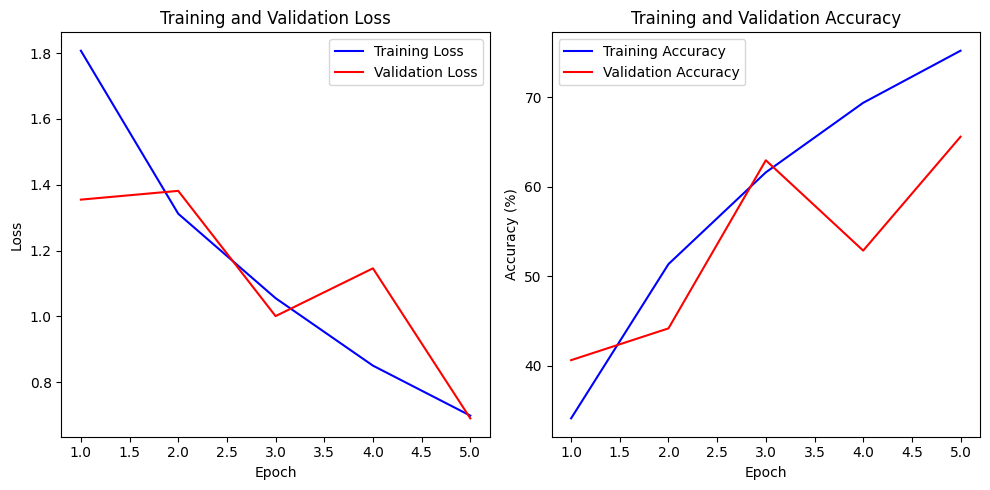

In [ ]:
import matplotlib.pyplot as plt

#  data
epochs = range(1, 6)
training_loss = [1.8071, 1.3120, 1.0555, 0.8506, 0.6988]  # Sample training loss data
validation_loss = [1.3548, 1.3814, 1.0010, 1.1461, 0.6905]  # Sample validation loss data
training_accuracy = [34.12, 51.35, 61.60, 69.37, 75.19]  # Sample training accuracy data
validation_accuracy = [40.62, 44.17, 62.95, 52.86, 65.58]  # Sample validation accuracy data

# Plotting Training and Validation Loss
plt.figure(figsize=(10, 5))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'b-', label="Training Loss")
plt.plot(epochs, validation_loss, 'r-', label="Validation Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, 'b-', label="Training Accuracy")
plt.plot(epochs, validation_accuracy, 'r-', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


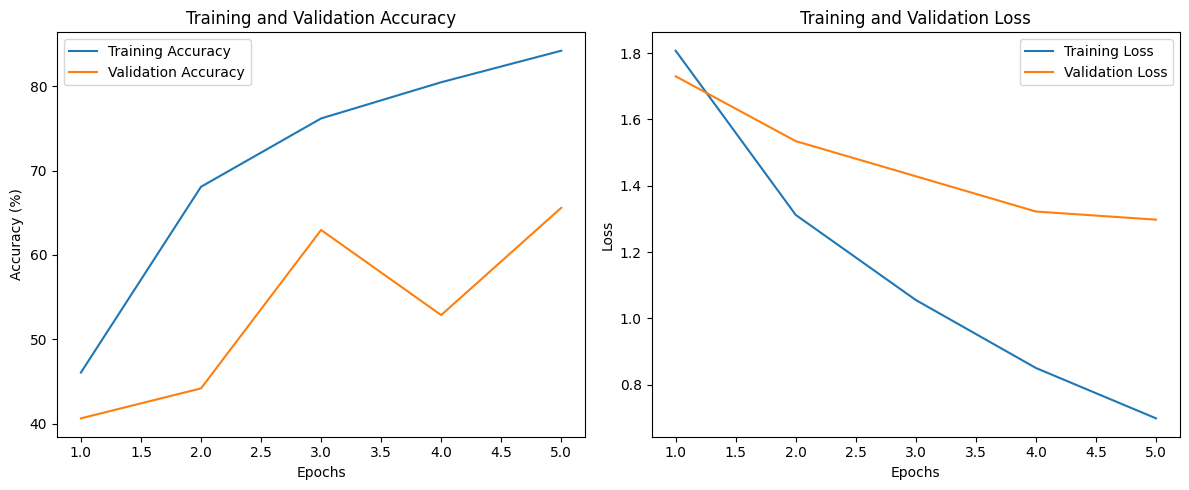

In [ ]:
import matplotlib.pyplot as plt
# Data from model
epochs = [1, 2, 3, 4, 5]  # Update as per actual number of epochs

# Replace these lists with your actual values for each fold/run
train_accuracies = [46.05, 68.07, 76.17, 80.46, 84.20]
val_accuracies = [40.62, 44.17, 62.95, 52.86, 65.58]
train_losses = [1.8071, 1.3120, 1.0555, 0.8506, 0.6988]
val_losses = [1.7300, 1.5345, 1.4286, 1.3223, 1.2978]

# Plotting Training and Validation Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


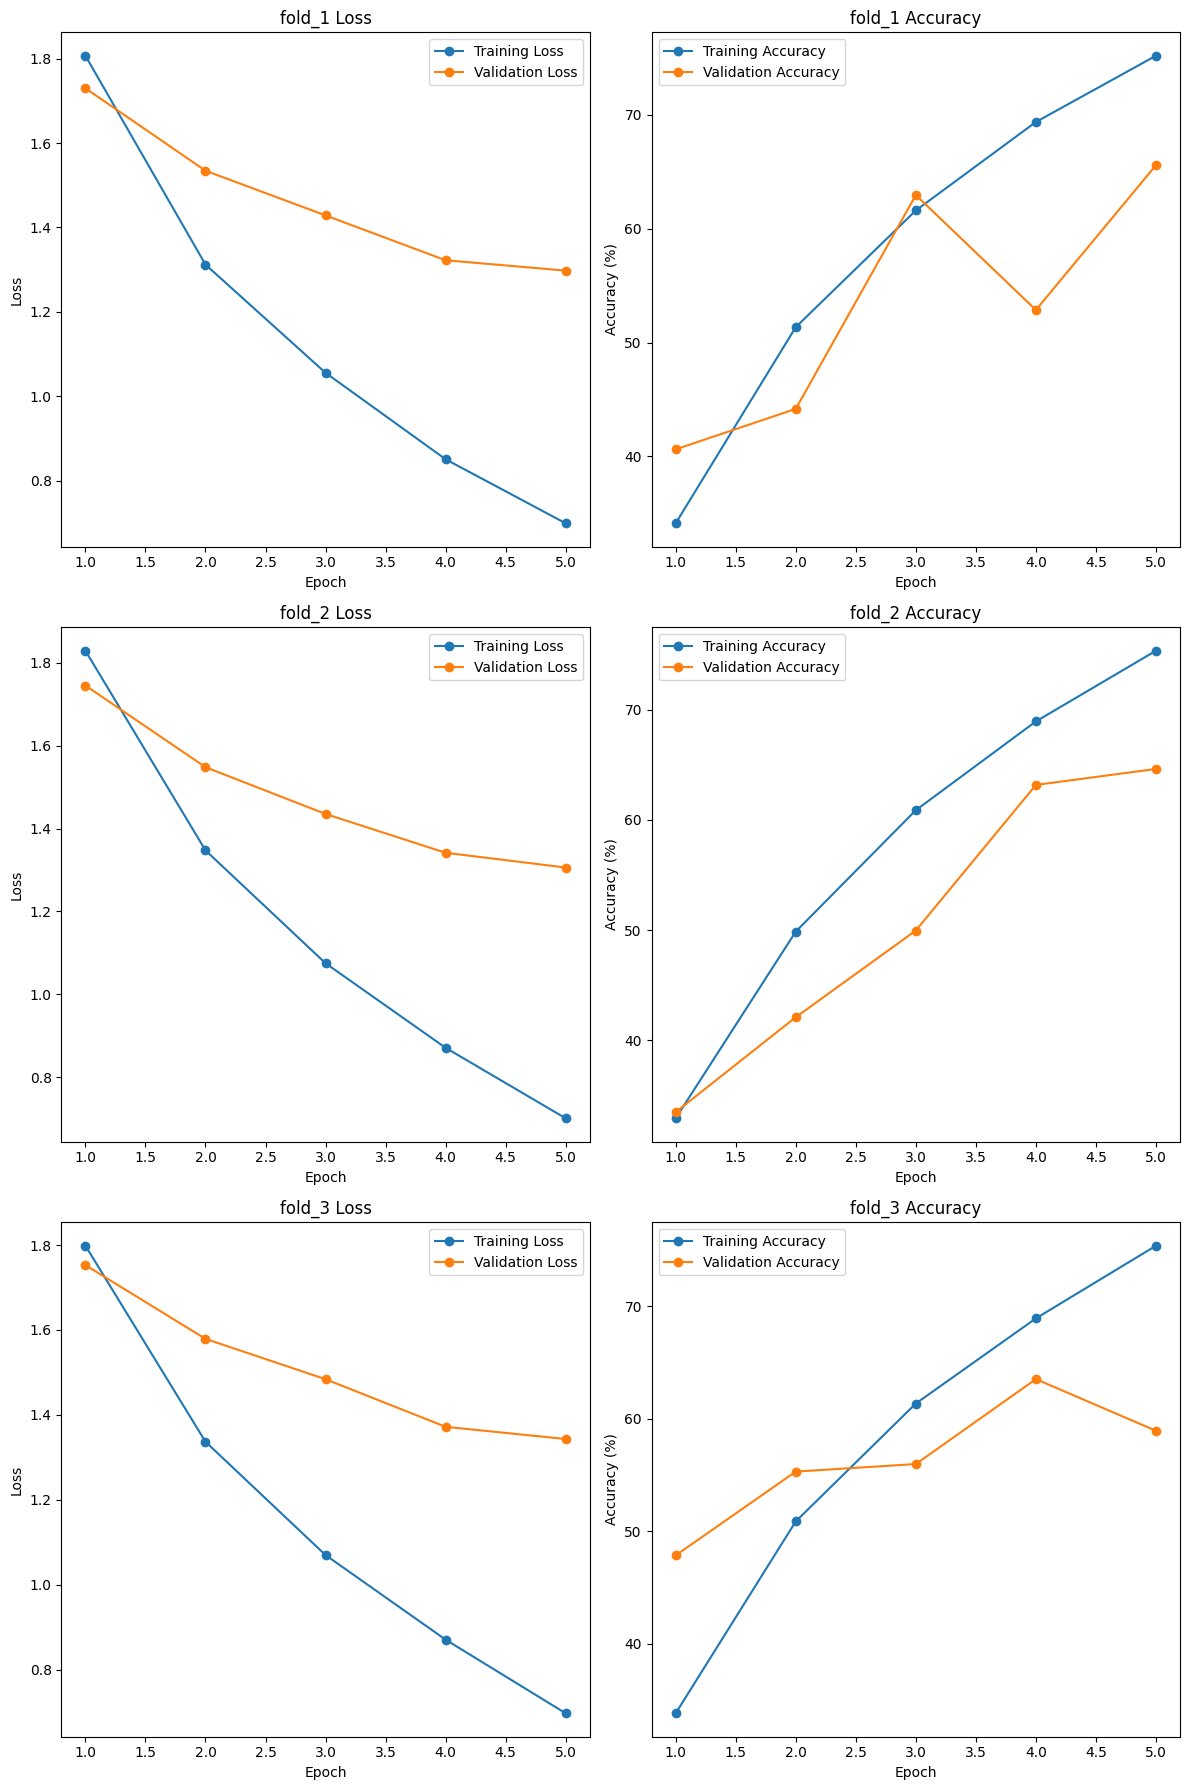

In [ ]:
import matplotlib.pyplot as plt

# Data from model

results = {
    "fold_1": {
        "train_loss": [1.8071, 1.3120, 1.0555, 0.8506, 0.6988],
        "train_accuracy": [34.12, 51.35, 61.60, 69.37, 75.19],
        "val_loss": [1.7300, 1.5345, 1.4286, 1.3223, 1.2978],
        "val_accuracy": [40.62, 44.17, 62.95, 52.86, 65.58]
    },
    "fold_2": {
        "train_loss": [1.8291, 1.3474, 1.0750, 0.8710, 0.7009],
        "train_accuracy": [32.94, 49.87, 60.88, 68.93, 75.34],
        "val_loss": [1.7451, 1.5481, 1.4352, 1.3416, 1.3060],
        "val_accuracy": [33.50, 42.11, 49.97, 63.17, 64.62]
    },
    "fold_3": {
        "train_loss": [1.7984, 1.3366, 1.0696, 0.8703, 0.6968],
        "train_accuracy": [33.82, 50.88, 61.36, 68.93, 75.39],
        "val_loss": [1.7527, 1.5790, 1.4839, 1.3718, 1.3430],
        "val_accuracy": [47.86, 55.31, 55.98, 63.53, 58.94]
    }
}

# Function to plot the curves for each fold
def plot_curves(results):
    epochs = range(1, 6)  # Assuming 5 epochs
    num_folds = len(results)

    fig, axes = plt.subplots(num_folds, 2, figsize=(12, 6 * num_folds))

    for i, (fold, metrics) in enumerate(results.items()):
        # Plot Training and Validation Loss
        axes[i, 0].plot(epochs, metrics["train_loss"], 'o-', label='Training Loss')
        axes[i, 0].plot(epochs, metrics["val_loss"], 'o-', label='Validation Loss')
        axes[i, 0].set_title(f'{fold} Loss')
        axes[i, 0].set_xlabel('Epoch')
        axes[i, 0].set_ylabel('Loss')
        axes[i, 0].legend()

        # Plot Training and Validation Accuracy
        axes[i, 1].plot(epochs, metrics["train_accuracy"], 'o-', label='Training Accuracy')
        axes[i, 1].plot(epochs, metrics["val_accuracy"], 'o-', label='Validation Accuracy')
        axes[i, 1].set_title(f'{fold} Accuracy')
        axes[i, 1].set_xlabel('Epoch')
        axes[i, 1].set_ylabel('Accuracy (%)')
        axes[i, 1].legend()

    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_curves(results)


In [ ]:
#Testing

# Resnet-18 model With data augmentation without L2 for hyper-perameter tuning

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from sklearn.model_selection import KFold
import numpy as np
import torchvision.models as models

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transformation for training set with data augmentation
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

# Transformation for validation set without augmentation
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

# Load CIFAR-10 dataset
full_train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)

# Define loss function
criterion = nn.CrossEntropyLoss()

# Hyperparameters to test in cross-validation
learning_rates = [0.1, 0.01, 0.001]
optimizers = ['SGD', 'Adam']
best_accuracy = 0.0
best_hyperparams = {}

# Set up 3-fold cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Function to create a new ResNet-18 model instance
def create_model():
    model = models.resnet18(pretrained=False)
    model.fc = nn.Linear(model.fc.in_features, 10)  # CIFAR-10 has 10 classes
    return model.to(device)

# Cross-validation to find the best hyperparameters
for lr in learning_rates:
    for opt_name in optimizers:
        fold_accuracies = []

        # 3-fold cross-validation
        for train_idx, val_idx in kf.split(full_train_data):
            # Create data loaders for the current fold
            train_fold = torch.utils.data.Subset(full_train_data, train_idx)
            val_fold = torch.utils.data.Subset(full_train_data, val_idx)
            train_loader = DataLoader(train_fold, batch_size=64, shuffle=True, num_workers=4)
            val_loader = DataLoader(val_fold, batch_size=64, shuffle=False, num_workers=4)

            # Initialize the model and optimizer for each fold
            model = create_model()
            optimizer = optim.SGD(model.parameters(), lr=lr) if opt_name == 'SGD' else optim.Adam(model.parameters(), lr=lr)

            # Train for 5 epochs and track training and validation accuracy
            for epoch in range(5):
                model.train()
                running_loss = 0.0
                correct_train = 0
                total_train = 0

                for inputs, labels in train_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    optimizer.zero_grad()
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    loss.backward()
                    optimizer.step()
                    running_loss += loss.item()

                    # Track training accuracy
                    _, predicted = torch.max(outputs.data, 1)
                    total_train += labels.size(0)
                    correct_train += (predicted == labels).sum().item()

                train_accuracy = 100 * correct_train / total_train
                print(f"Epoch {epoch+1}, Training Loss: {running_loss/len(train_loader):.4f}, Training Accuracy: {train_accuracy:.2f}%")

                # Validate the model
                model.eval()
                correct_val = 0
                total_val = 0
                running_val_loss = 0.0
                with torch.no_grad():
                    for inputs, labels in val_loader:
                        inputs, labels = inputs.to(device), labels.to(device)
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)
                        running_val_loss += loss.item()

                        _, predicted = torch.max(outputs.data, 1)
                        total_val += labels.size(0)
                        correct_val += (predicted == labels).sum().item()

                val_accuracy = 100 * correct_val / total_val
                val_loss = running_val_loss / len(val_loader)
                print(f"Epoch {epoch+1}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

            # Store the final accuracy for this fold
            fold_accuracies.append(val_accuracy)

        # Average accuracy across folds
        avg_accuracy = np.mean(fold_accuracies)

        # Check if this is the best hyperparameter combination so far
        if avg_accuracy > best_accuracy:
            best_accuracy = avg_accuracy
            best_hyperparams = {'learning_rate': lr, 'optimizer': opt_name}
            print(f"New best hyperparameters: {best_hyperparams} with accuracy: {best_accuracy:.2f}%")

print(f"Best hyperparameters found: {best_hyperparams} with accuracy: {best_accuracy:.2f}%")

# Set up DataLoader for the full training and validation sets
train_size = int(0.8 * len(full_train_data))
val_size = len(full_train_data) - train_size
train_data, val_data = random_split(full_train_data, [train_size, val_size])

# Apply validation transform to the validation set
val_data.dataset.transform = val_transform

train_loader = DataLoader(train_data, batch_size=64, shuffle=True, num_workers=4)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False, num_workers=4)

# Reinitialize the model with the best hyperparameters
model = create_model()
lr = best_hyperparams['learning_rate']
if best_hyperparams['optimizer'] == 'SGD':
    optimizer = optim.SGD(model.parameters(), lr=lr)
else:
    optimizer = optim.Adam(model.parameters(), lr=lr)

# Train the model on the full training set for 5 epochs
for epoch in range(5):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Track training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}, Training Accuracy: {train_accuracy:.2f}%")

# Validate the model on the validation set
model.eval()
correct_val = 0
total_val = 0
running_val_loss = 0.0
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        running_val_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_val += labels.size(0)
        correct_val += (predicted == labels).sum().item()

validation_accuracy = 100 * correct_val / total_val
validation_loss = running_val_loss / len(val_loader)
print(f"Final Validation Loss: {validation_loss:.4f}, Final Validation Accuracy: {validation_accuracy:.2f}%")

# Save the trained model
torch.save(model.state_dict(), 'resnet18_best_model_with_augmentation.pth')
print("Model saved as 'resnet18_best_model_with_augmentation.pth'")


Files already downloaded and verified
Epoch 1, Training Loss: 1.7802, Training Accuracy: 35.31%
Epoch 1, Validation Loss: 1.3548, Validation Accuracy: 49.75%
Epoch 2, Training Loss: 1.2672, Training Accuracy: 53.37%
Epoch 2, Validation Loss: 1.3814, Validation Accuracy: 50.58%
Epoch 3, Training Loss: 1.0040, Training Accuracy: 63.93%
Epoch 3, Validation Loss: 1.0010, Validation Accuracy: 64.38%
Epoch 4, Training Loss: 0.8351, Training Accuracy: 70.53%
Epoch 4, Validation Loss: 1.1461, Validation Accuracy: 61.31%
Epoch 5, Training Loss: 0.7104, Training Accuracy: 75.09%
Epoch 5, Validation Loss: 0.6905, Validation Accuracy: 76.11%
Epoch 1, Training Loss: 1.7376, Training Accuracy: 35.94%
Epoch 1, Validation Loss: 1.5660, Validation Accuracy: 44.64%
Epoch 2, Training Loss: 1.2436, Training Accuracy: 54.29%
Epoch 2, Validation Loss: 1.2842, Validation Accuracy: 54.29%
Epoch 3, Training Loss: 0.9996, Training Accuracy: 63.97%
Epoch 3, Validation Loss: 1.0263, Validation Accuracy: 62.95%
Ep

# Training and validation Accuracy and Loss curve of Resnet-18 model With data augmentation without L2

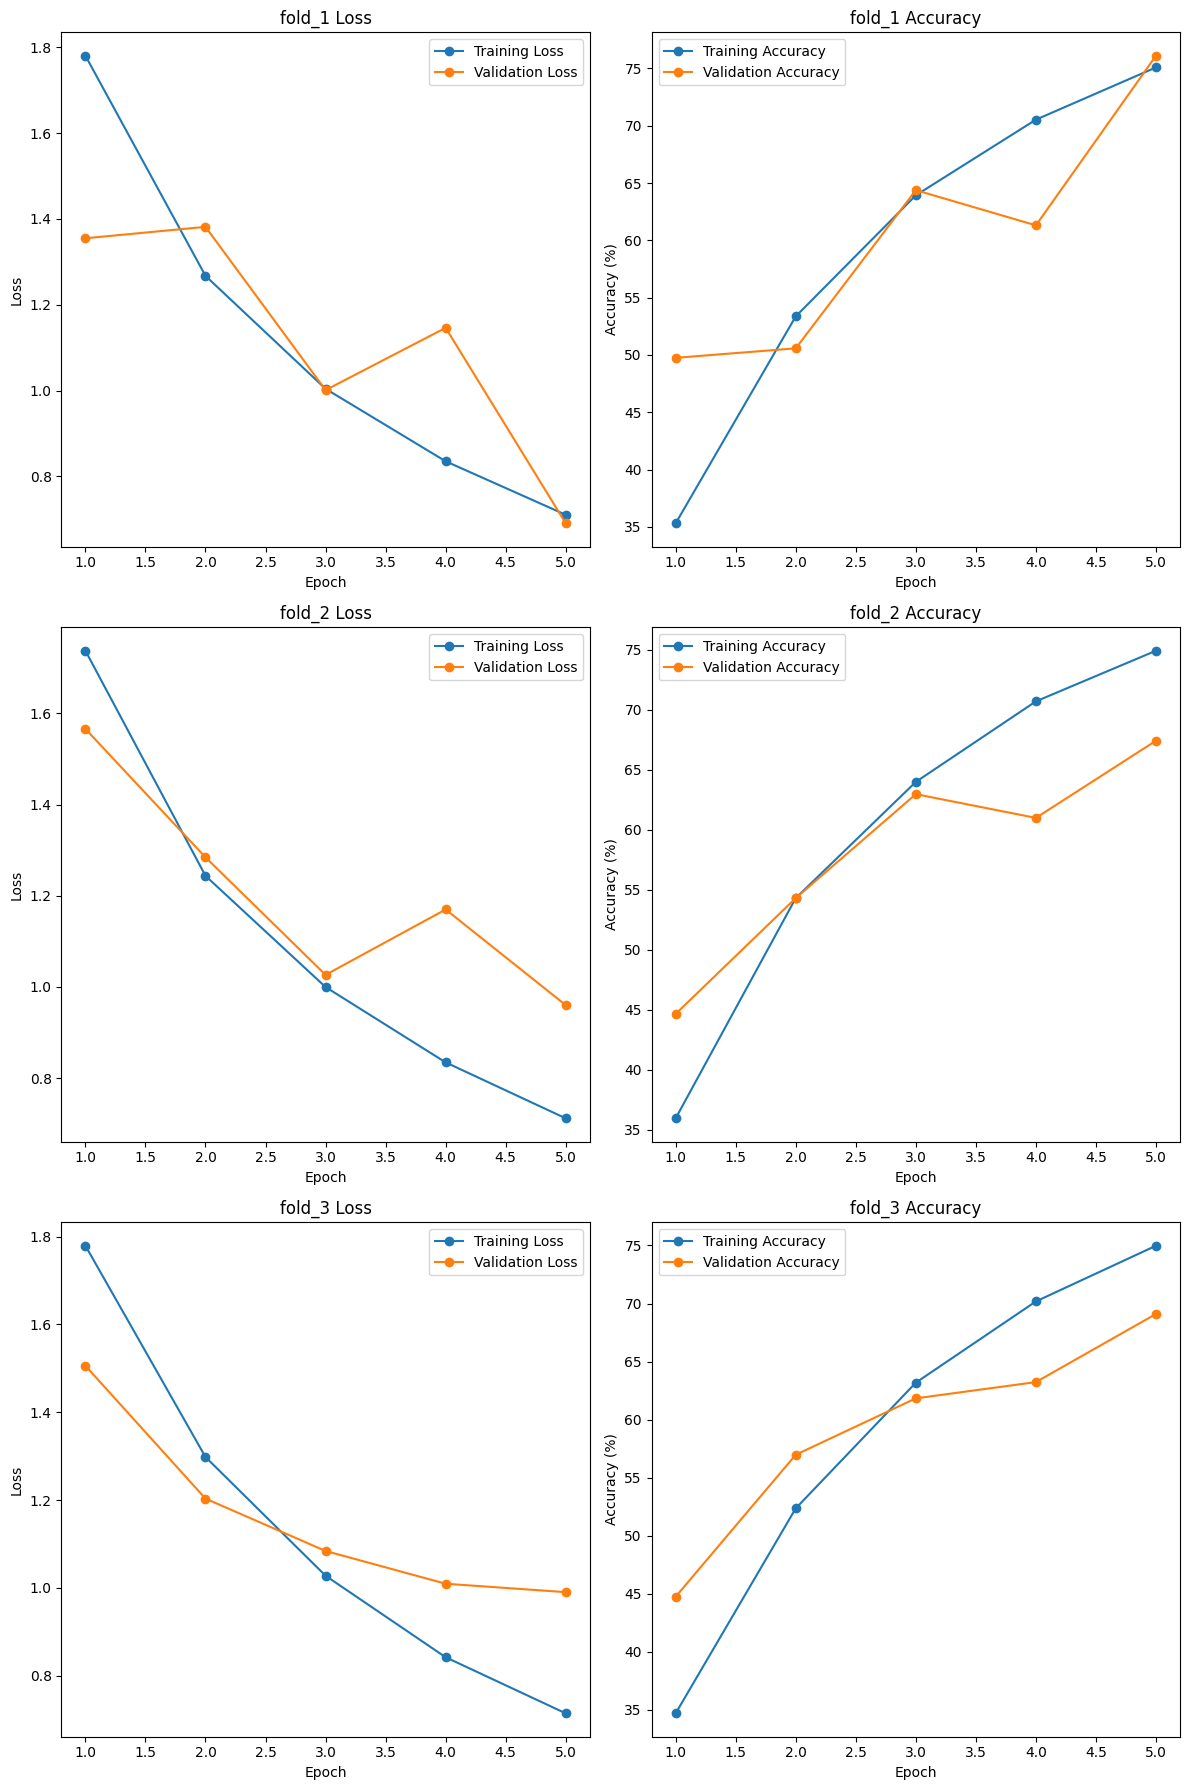

In [ ]:
import matplotlib.pyplot as plt

# Data  from the output
results = {
    "fold_1": {
        "train_loss": [1.7802, 1.2672, 1.0040, 0.8351, 0.7104],
        "train_accuracy": [35.31, 53.37, 63.93, 70.53, 75.09],
        "val_loss": [1.3548, 1.3814, 1.0010, 1.1461, 0.6905],
        "val_accuracy": [49.75, 50.58, 64.38, 61.31, 76.11]
    },
    "fold_2": {
        "train_loss": [1.7376, 1.2436, 0.9996, 0.8343, 0.7115],
        "train_accuracy": [35.94, 54.29, 63.97, 70.68, 74.90],
        "val_loss": [1.5660, 1.2842, 1.0263, 1.1698, 0.9599],
        "val_accuracy": [44.64, 54.29, 62.95, 60.97, 67.40]
    },
    "fold_3": {
        "train_loss": [1.7794, 1.2980, 1.0275, 0.8418, 0.7140],
        "train_accuracy": [34.69, 52.35, 63.18, 70.18, 74.98],
        "val_loss": [1.5059, 1.2032, 1.0839, 1.0093, 0.9901],
        "val_accuracy": [44.74, 56.97, 61.83, 63.23, 69.10]
    }
}

# Function to plot the curves for each fold
def plot_curves(results):
    epochs = range(1, 6)  # Assuming 5 epochs
    num_folds = len(results)

    fig, axes = plt.subplots(num_folds, 2, figsize=(12, 6 * num_folds))

    for i, (fold, metrics) in enumerate(results.items()):
        # Plot Training and Validation Loss
        axes[i, 0].plot(epochs, metrics["train_loss"], 'o-', label='Training Loss')
        axes[i, 0].plot(epochs, metrics["val_loss"], 'o-', label='Validation Loss')
        axes[i, 0].set_title(f'{fold} Loss')
        axes[i, 0].set_xlabel('Epoch')
        axes[i, 0].set_ylabel('Loss')
        axes[i, 0].legend()

        # Plot Training and Validation Accuracy
        axes[i, 1].plot(epochs, metrics["train_accuracy"], 'o-', label='Training Accuracy')
        axes[i, 1].plot(epochs, metrics["val_accuracy"], 'o-', label='Validation Accuracy')
        axes[i, 1].set_title(f'{fold} Accuracy')
        axes[i, 1].set_xlabel('Epoch')
        axes[i, 1].set_ylabel('Accuracy (%)')
        axes[i, 1].legend()

    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_curves(results)


# Resnet-18 model summary

In [ ]:
import torch
import torchvision.models as models
from torchsummary import summary

# Load the ResNet-18 model
model = models.resnet18(pretrained=False)  # Set pretrained=True if you want to load pretrained weights

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Print model summary
summary(model, (3, 224, 224))  # 3 channels, 224x224 input size


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

# Alexnet model applying cross validation and optimizer

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from sklearn.model_selection import KFold
import numpy as np
import torchvision.models as models

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the transformation: resize and normalize (no data augmentation)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

# Load CIFAR-10 dataset
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Define loss function
criterion = nn.CrossEntropyLoss()

# Hyperparameters to test in cross-validation
learning_rates = [0.1, 0.01, 0.001]
optimizers = ['SGD', 'Adam']
best_accuracy = 0.0
best_hyperparams = {}

# Set up 3-fold cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Function to create a new AlexNet model instance
def create_model():
    model = models.alexnet(pretrained=False)
    model.classifier[6] = nn.Linear(model.classifier[6].in_features, 10)  # CIFAR-10 has 10 classes
    return model.to(device)

# Cross-validation to find the best hyperparameters
for lr in learning_rates:
    for opt_name in optimizers:
        fold_accuracies = []

        # 3-fold cross-validation
        for train_idx, val_idx in kf.split(train_data):
            # Create data loaders for the current fold
            train_fold = torch.utils.data.Subset(train_data, train_idx)
            val_fold = torch.utils.data.Subset(train_data, val_idx)
            train_loader = DataLoader(train_fold, batch_size=64, shuffle=True, num_workers=4)
            val_loader = DataLoader(val_fold, batch_size=64, shuffle=False, num_workers=4)

            # Initialize the model and optimizer for each fold
            model = create_model()
            optimizer = optim.SGD(model.parameters(), lr=lr) if opt_name == 'SGD' else optim.Adam(model.parameters(), lr=lr)

            # Train for 5 epochs and track training and validation accuracy
            for epoch in range(5):
                model.train()
                running_loss = 0.0
                correct_train = 0
                total_train = 0

                for inputs, labels in train_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    optimizer.zero_grad()
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    loss.backward()
                    optimizer.step()
                    running_loss += loss.item()

                    # Track training accuracy
                    _, predicted = torch.max(outputs.data, 1)
                    total_train += labels.size(0)
                    correct_train += (predicted == labels).sum().item()

                train_accuracy = 100 * correct_train / total_train
                print(f"Epoch {epoch+1}, Training Loss: {running_loss/len(train_loader):.4f}, Training Accuracy: {train_accuracy:.2f}%")

                # Validate the model
                model.eval()
                correct_val = 0
                total_val = 0
                with torch.no_grad():
                    for inputs, labels in val_loader:
                        inputs, labels = inputs.to(device), labels.to(device)
                        outputs = model(inputs)
                        _, predicted = torch.max(outputs.data, 1)
                        total_val += labels.size(0)
                        correct_val += (predicted == labels).sum().item()

                val_accuracy = 100 * correct_val / total_val
                print(f"Epoch {epoch+1}, Validation Accuracy: {val_accuracy:.2f}%")

            # Calculate fold accuracy and add it to the list of accuracies for the current hyperparameters
            fold_accuracies.append(val_accuracy)

        # Average accuracy across folds
        avg_accuracy = np.mean(fold_accuracies)

        # Check if this is the best hyperparameter combination so far
        if avg_accuracy > best_accuracy:
            best_accuracy = avg_accuracy
            best_hyperparams = {'learning_rate': lr, 'optimizer': opt_name}
            print(f"New best hyperparameters: {best_hyperparams} with accuracy: {best_accuracy:.2f}%")

print(f"Best hyperparameters found: {best_hyperparams} with accuracy: {best_accuracy:.2f}%")

# Set up DataLoader for the full training and validation sets
train_size = int(0.8 * len(train_data))
val_size = len(train_data) - train_size
train_data, val_data = random_split(train_data, [train_size, val_size])
train_loader = DataLoader(train_data, batch_size=64, shuffle=True, num_workers=4)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False, num_workers=4)

# Reinitialize the model with the best hyperparameters
model = create_model()
lr = best_hyperparams['learning_rate']
if best_hyperparams['optimizer'] == 'SGD':
    optimizer = optim.SGD(model.parameters(), lr=lr)
else:
    optimizer = optim.Adam(model.parameters(), lr=lr)

# Train the model on the full training set for 5 epochs
for epoch in range(5):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Track training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}, Training Accuracy: {train_accuracy:.2f}%")

# Validate the model on the validation set
model.eval()
correct_val = 0
total_val = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_val += labels.size(0)
        correct_val += (predicted == labels).sum().item()

validation_accuracy = 100 * correct_val / total_val
print(f"Final Validation Accuracy: {validation_accuracy:.2f}%")

# Save the trained model
torch.save(model.state_dict(), 'alexnet_best_model.pth')
print("Model saved as 'alexnet_best_model.pth'")


Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1, Training Loss: 2.0665, Training Accuracy: 22.95%
Epoch 1, Validation Accuracy: 31.51%
Epoch 2, Training Loss: 1.6234, Training Accuracy: 40.33%
Epoch 2, Validation Accuracy: 46.76%
Epoch 3, Training Loss: 1.3342, Training Accuracy: 52.22%
Epoch 3, Validation Accuracy: 59.28%
Epoch 4, Training Loss: 1.1119, Training Accuracy: 60.96%
Epoch 4, Validation Accuracy: 64.22%
Epoch 5, Training Loss: 0.9424, Training Accuracy: 67.06%
Epoch 5, Validation Accuracy: 71.16%
Epoch 1, Training Loss: 2.1003, Training Accuracy: 21.62%


Testing accuracy

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision.models as models

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the transformation for the test set: resize and normalize (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

# Load CIFAR-10 test dataset
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)

# Create DataLoader for the test set
test_loader = DataLoader(test_data, batch_size=64, shuffle=False, num_workers=4)

# Load the AlexNet model and modify the final layer for CIFAR-10
model = models.alexnet(pretrained=False)  # Load AlexNet without pretrained weights
model.classifier[6] = nn.Linear(model.classifier[6].in_features, 10)  # CIFAR-10 has 10 classes
model = model.to(device)

# Load the saved model weights
model.load_state_dict(torch.load('alexnet_best_model.pth'))  # Adjust the path if your model file has a different name
model.eval()  # Set the model to evaluation mode

# Evaluate the model on the test set
correct = 0
total = 0

# Disable gradient calculations for testing
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate and print the accuracy on the test set
test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")


# MobileNetV2 with Cross-Validation and optimizer

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import KFold
import numpy as np

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data augmentation and normalization for training
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Normalization for validation
transform_val = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_val)

# Cross-validation setup
k_folds = 3
num_epochs = 5
batch_size = 64
learning_rate = 0.001
weight_decay = 0.01  # L2 regularization

# Prepare K-fold cross-validation
kfold = KFold(n_splits=k_folds, shuffle=True)
best_val_accuracy = 0
best_model_state = None

# For each fold
for fold, (train_idx, val_idx) in enumerate(kfold.split(dataset)):
    print(f"Fold {fold + 1}/{k_folds}")

    # Sample elements randomly from the training dataset
    train_subsampler = Subset(dataset, train_idx)
    val_subsampler = Subset(dataset, val_idx)

    # Define data loaders
    train_loader = DataLoader(train_subsampler, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subsampler, batch_size=batch_size, shuffle=False)

    # Initialize the model
    model = models.mobilenet_v2(pretrained=False)
    model.classifier[1] = nn.Linear(model.last_channel, 10)  # CIFAR-10 has 10 classes
    model = model.to(device)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    # Scheduler for learning rate decay
    scheduler = StepLR(optimizer, step_size=3, gamma=0.1)

    # Training and validation loop
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            # Accumulate metrics
            train_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_loss /= total
        train_accuracy = 100. * correct / total

        # Validation phase
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

        val_loss /= total
        val_accuracy = 100. * correct / total

        # Print metrics for this epoch
        print(f"Epoch [{epoch + 1}/{num_epochs}], "
              f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
              f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")

        # Save the best model based on validation accuracy
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_model_state = model.state_dict()

        # Step the scheduler
        scheduler.step()

# Save the best model after training
torch.save(best_model_state, 'mobilenetv2_best_model.pth')
print(f"Best Validation Accuracy: {best_val_accuracy:.2f}%")


100%|██████████| 170M/170M [00:12<00:00, 13.7MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Fold 1/3


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch [1/5], Train Loss: 2.0487, Train Accuracy: 23.72%, Val Loss: 1.8499, Val Accuracy: 31.01%
Epoch [2/5], Train Loss: 1.7296, Train Accuracy: 34.30%, Val Loss: 1.8109, Val Accuracy: 32.71%
Epoch [3/5], Train Loss: 1.6157, Train Accuracy: 39.65%, Val Loss: 1.6549, Val Accuracy: 40.67%
Epoch [4/5], Train Loss: 1.4467, Train Accuracy: 47.06%, Val Loss: 1.4253, Val Accuracy: 48.28%
Epoch [5/5], Train Loss: 1.3963, Train Accuracy: 49.38%, Val Loss: 1.3770, Val Accuracy: 50.27%
Fold 2/3
Epoch [1/5], Train Loss: 2.0520, Train Accuracy: 22.99%, Val Loss: 1.8956, Val Accuracy: 28.33%
Epoch [2/5], Train Loss: 1.7675, Train Accuracy: 33.28%, Val Loss: 1.7716, Val Accuracy: 33.32%
Epoch [3/5], Train Loss: 1.6320, Train Accuracy: 38.97%, Val Loss: 1.7150, Val Accuracy: 35.56%
Epoch [4/5], Train Loss: 1.4587, Train Accuracy: 45.74%, Val Loss: 1.4333, Val Accuracy: 46.91%
Epoch [5/5], Train Loss: 1.4122, Train Accuracy: 48.58%, Val Loss: 1.4067, Val Accuracy: 50.10%
Fold 3/3
Epoch [1/5], Train Los

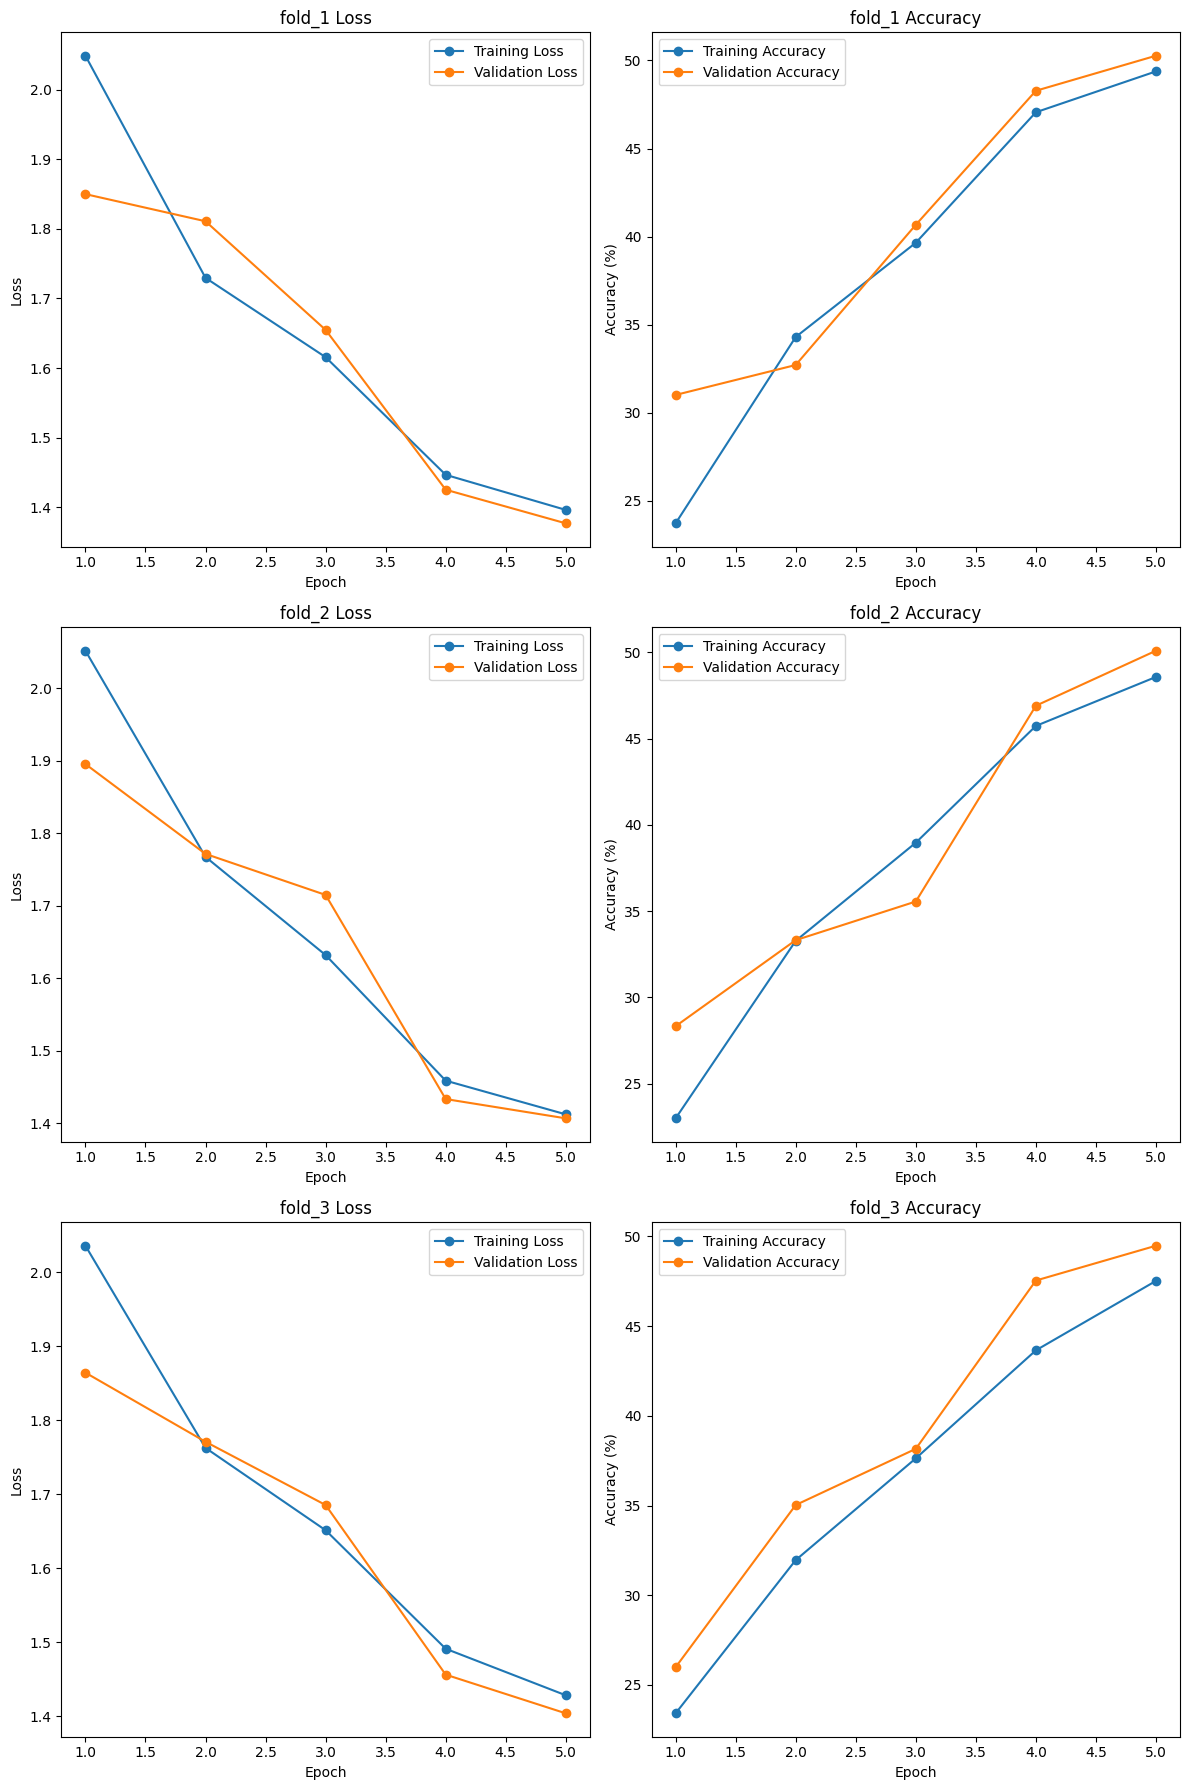

In [ ]:
import matplotlib.pyplot as plt

# Data for each fold
results = {
    "fold_1": {
        "train_loss": [2.0487, 1.7296, 1.6157, 1.4467, 1.3963],
        "train_accuracy": [23.72, 34.30, 39.65, 47.06, 49.38],
        "val_loss": [1.8499, 1.8109, 1.6549, 1.4253, 1.3770],
        "val_accuracy": [31.01, 32.71, 40.67, 48.28, 50.27]
    },
    "fold_2": {
        "train_loss": [2.0520, 1.7675, 1.6320, 1.4587, 1.4122],
        "train_accuracy": [22.99, 33.28, 38.97, 45.74, 48.58],
        "val_loss": [1.8956, 1.7716, 1.7150, 1.4333, 1.4067],
        "val_accuracy": [28.33, 33.32, 35.56, 46.91, 50.10]
    },
    "fold_3": {
        "train_loss": [2.0360, 1.7627, 1.6514, 1.4912, 1.4283],
        "train_accuracy": [23.42, 31.96, 37.63, 43.65, 47.52],
        "val_loss": [1.8644, 1.7710, 1.6855, 1.4562, 1.4039],
        "val_accuracy": [25.99, 35.03, 38.16, 47.54, 49.48]
    }
}

# Function to plot the curves for each fold
def plot_curves(results):
    epochs = range(1, 6)  # 5 epochs
    num_folds = len(results)

    fig, axes = plt.subplots(num_folds, 2, figsize=(12, 6 * num_folds))

    for i, (fold, metrics) in enumerate(results.items()):
        # Plot Training and Validation Loss
        axes[i, 0].plot(epochs, metrics["train_loss"], 'o-', label='Training Loss')
        axes[i, 0].plot(epochs, metrics["val_loss"], 'o-', label='Validation Loss')
        axes[i, 0].set_title(f'{fold} Loss')
        axes[i, 0].set_xlabel('Epoch')
        axes[i, 0].set_ylabel('Loss')
        axes[i, 0].legend()

        # Plot Training and Validation Accuracy
        axes[i, 1].plot(epochs, metrics["train_accuracy"], 'o-', label='Training Accuracy')
        axes[i, 1].plot(epochs, metrics["val_accuracy"], 'o-', label='Validation Accuracy')
        axes[i, 1].set_title(f'{fold} Accuracy')
        axes[i, 1].set_xlabel('Epoch')
        axes[i, 1].set_ylabel('Accuracy (%)')
        axes[i, 1].legend()

    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_curves(results)


# Testing Accuracy of MobilenetV2 model

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the test dataset with normalization (no augmentation)
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Load the best trained model
model = models.mobilenet_v2(pretrained=False)
model.classifier[1] = nn.Linear(model.last_channel, 10)  # CIFAR-10 has 10 classes
model.load_state_dict(torch.load('mobilenetv2_best_model.pth'))
model = model.to(device)
model.eval()  # Set the model to evaluation mode

# Define the loss function (optional if only accuracy is needed)
criterion = nn.CrossEntropyLoss()

# Initialize metrics
correct = 0
total = 0
test_loss = 0.0

# Test the model
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Calculate loss and accuracy
        test_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

# Calculate average loss and accuracy
test_loss /= total
test_accuracy = 100. * correct / total

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")


Files already downloaded and verified


<ipython-input-3-eefb738b4b2a>:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('mobilenetv2_best_model.pth'))


Test Loss: 1.3635, Test Accuracy: 50.50%


# Model MobilenetV2 with L2 regularization and Data Augmentation

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import KFold
import numpy as np

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data augmentation and normalization for training
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Normalization for validation
transform_val = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_val)

# Hyperparameters for tuning
k_folds = 3
num_epochs = 5
batch_size = 64
learning_rates = [0.001, 0.01, 0.1]  # 3 different learning rates
weight_decays = [0.0001, 0.001, 0.01]  # 3 different weight decay values

# Prepare K-fold cross-validation
kfold = KFold(n_splits=k_folds, shuffle=True)
best_val_accuracy = 0
best_model_state = None
best_hyperparams = {}

# Hyperparameter tuning loop
for lr in learning_rates:
    for wd in weight_decays:
        print(f"Testing with Learning Rate: {lr}, Weight Decay: {wd}")

        # For each fold
        fold_best_val_accuracy = 0  # Track best validation accuracy for current hyperparameters
        for fold, (train_idx, val_idx) in enumerate(kfold.split(dataset)):
            print(f"Fold {fold + 1}/{k_folds}")

            # Sample elements randomly from the training dataset
            train_subsampler = Subset(dataset, train_idx)
            val_subsampler = Subset(dataset, val_idx)

            # Define data loaders
            train_loader = DataLoader(train_subsampler, batch_size=batch_size, shuffle=True)
            val_loader = DataLoader(val_subsampler, batch_size=batch_size, shuffle=False)

            # Initialize the model
            model = models.mobilenet_v2(pretrained=False)
            model.classifier[1] = nn.Linear(model.last_channel, 10)  # CIFAR-10 has 10 classes
            model = model.to(device)

            # Define loss function and optimizer
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=wd)

            # Scheduler for learning rate decay
            scheduler = StepLR(optimizer, step_size=3, gamma=0.1)

            # Training and validation loop
            for epoch in range(num_epochs):
                # Training phase
                model.train()
                train_loss = 0.0
                correct = 0
                total = 0

                for inputs, labels in train_loader:
                    inputs, labels = inputs.to(device), labels.to(device)

                    # Zero the parameter gradients
                    optimizer.zero_grad()

                    # Forward pass
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    # Backward pass and optimization
                    loss.backward()
                    optimizer.step()

                    # Accumulate metrics
                    train_loss += loss.item() * inputs.size(0)
                    _, predicted = outputs.max(1)
                    total += labels.size(0)
                    correct += predicted.eq(labels).sum().item()

                train_loss /= total
                train_accuracy = 100. * correct / total

                # Validation phase
                model.eval()
                val_loss = 0.0
                correct = 0
                total = 0

                with torch.no_grad():
                    for inputs, labels in val_loader:
                        inputs, labels = inputs.to(device), labels.to(device)

                        outputs = model(inputs)
                        loss = criterion(outputs, labels)

                        val_loss += loss.item() * inputs.size(0)
                        _, predicted = outputs.max(1)
                        total += labels.size(0)
                        correct += predicted.eq(labels).sum().item()

                val_loss /= total
                val_accuracy = 100. * correct / total

                # Print metrics for this epoch
                print(f"Epoch [{epoch + 1}/{num_epochs}], "
                      f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
                      f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")

                # Save the best model for the current fold if validation accuracy improves
                if val_accuracy > fold_best_val_accuracy:
                    fold_best_val_accuracy = val_accuracy
                    fold_best_model_state = model.state_dict()

                # Step the scheduler
                scheduler.step()

        # Update best model and hyperparameters if current hyperparameters are better
        if fold_best_val_accuracy > best_val_accuracy:
            best_val_accuracy = fold_best_val_accuracy
            best_model_state = fold_best_model_state
            best_hyperparams = {'learning_rate': lr, 'weight_decay': wd}

print(f"Best Validation Accuracy: {best_val_accuracy:.2f}% with Hyperparameters: {best_hyperparams}")
torch.save(best_model_state, 'mobilenetv2_best_model.pth')


Files already downloaded and verified
Files already downloaded and verified
Testing with Learning Rate: 0.001, Weight Decay: 0.0001
Fold 1/3
Epoch [1/5], Train Loss: 1.9950, Train Accuracy: 26.07%, Val Loss: 1.7300, Val Accuracy: 35.57%
Epoch [2/5], Train Loss: 1.6601, Train Accuracy: 38.73%, Val Loss: 1.5345, Val Accuracy: 43.27%
Epoch [3/5], Train Loss: 1.5172, Train Accuracy: 45.03%, Val Loss: 1.4286, Val Accuracy: 47.93%
Epoch [4/5], Train Loss: 1.3666, Train Accuracy: 50.67%, Val Loss: 1.3223, Val Accuracy: 51.69%
Epoch [5/5], Train Loss: 1.3238, Train Accuracy: 51.92%, Val Loss: 1.2978, Val Accuracy: 53.11%
Fold 2/3
Epoch [1/5], Train Loss: 2.0096, Train Accuracy: 25.40%, Val Loss: 1.7451, Val Accuracy: 34.30%
Epoch [2/5], Train Loss: 1.6575, Train Accuracy: 39.32%, Val Loss: 1.5481, Val Accuracy: 42.96%
Epoch [3/5], Train Loss: 1.5204, Train Accuracy: 44.65%, Val Loss: 1.4352, Val Accuracy: 48.16%
Epoch [4/5], Train Loss: 1.3826, Train Accuracy: 50.17%, Val Loss: 1.3416, Val Acc

# Curve loss and accuracy

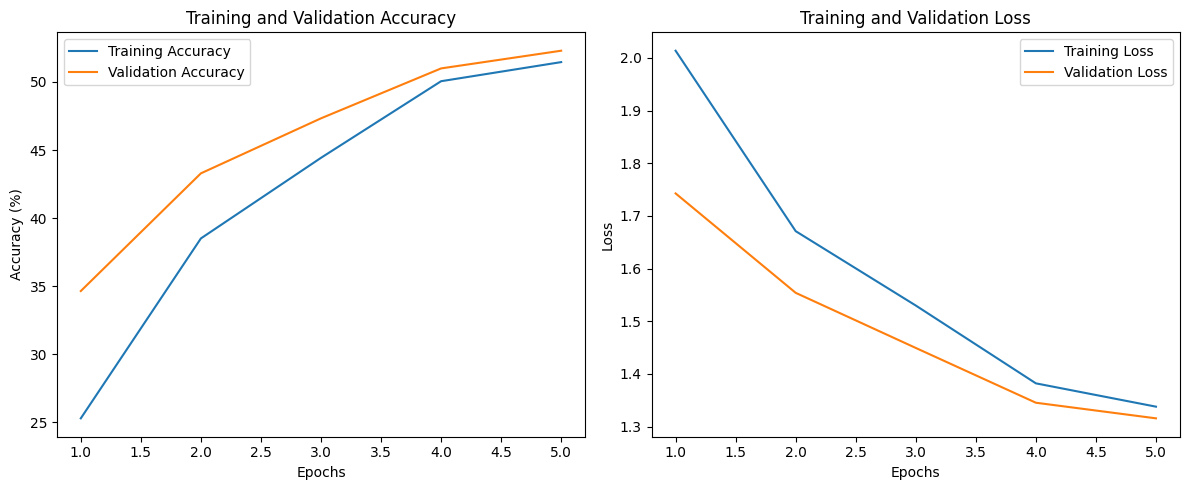

In [ ]:
import matplotlib.pyplot as plt
import numpy as np # Import numpy library

# data from model output
train_accuracies = [
    [26.07, 38.73, 45.03, 50.67, 51.92],  # Fold 1 for a specific hyperparameter combination
    [25.40, 39.32, 44.65, 50.17, 51.80],  # Fold 2 for the same combination
    [24.41, 37.47, 43.60, 49.32, 50.65]   # Fold 3 for the same combination
]
val_accuracies = [
    [35.57, 43.27, 47.93, 51.69, 53.11],
    [34.30, 42.96, 48.16, 51.03, 52.57],
    [34.06, 43.63, 45.89, 50.26, 51.20]
]
train_losses = [
    [1.9950, 1.6601, 1.5172, 1.3666, 1.3238],
    [2.0096, 1.6575, 1.5204, 1.3826, 1.3304],
    [2.0360, 1.6952, 1.5517, 1.3969, 1.3591]
]
val_losses = [
    [1.7300, 1.5345, 1.4286, 1.3223, 1.2978],
    [1.7451, 1.5481, 1.4352, 1.3416, 1.3060],
    [1.7527, 1.5790, 1.4839, 1.3718, 1.3430]
]

epochs = range(1, 6)  # 5 epochs

# Average across folds for plotting
avg_train_accuracy = np.mean(train_accuracies, axis=0)
avg_val_accuracy = np.mean(val_accuracies, axis=0)
avg_train_loss = np.mean(train_losses, axis=0)
avg_val_loss = np.mean(val_losses, axis=0)

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, avg_train_accuracy, label='Training Accuracy')
plt.plot(epochs, avg_val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, avg_train_loss, label='Training Loss')
plt.plot(epochs, avg_val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Variables to store the best values
best_train_accuracy = 0
best_val_accuracy = 0
best_train_loss = float('inf')
best_val_loss = float('inf')

# Assuming `train_accuracies`, `val_accuracies`, `train_losses`, and `val_losses` contain metrics for all epochs across all folds
# Flatten the lists to find the best values across all epochs and folds
all_train_accuracies = np.array(train_accuracies).flatten()
all_val_accuracies = np.array(val_accuracies).flatten()
all_train_losses = np.array(train_losses).flatten()
all_val_losses = np.array(val_losses).flatten()

# Find the best values
best_train_accuracy = np.max(all_train_accuracies)
best_val_accuracy = np.max(all_val_accuracies)
best_train_loss = np.min(all_train_losses)
best_val_loss = np.min(all_val_losses)

# Print the best values
print(f"Best Training Accuracy: {best_train_accuracy:.2f}%")
print(f"Best Validation Accuracy: {best_val_accuracy:.2f}%")
print(f"Lowest Training Loss: {best_train_loss:.4f}")
print(f"Lowest Validation Loss: {best_val_loss:.4f}")


Best Training Accuracy: 51.92%
Best Validation Accuracy: 53.11%
Lowest Training Loss: 1.3238
Lowest Validation Loss: 1.2978


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from sklearn.model_selection import KFold
import numpy as np
import torchvision.models as models

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transformation for training and validation set (no data augmentation)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

# Load CIFAR-10 dataset
full_train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Define loss function
criterion = nn.CrossEntropyLoss()

# Hyperparameters to test in cross-validation
learning_rates = [0.1, 0.01, 0.001]
optimizers = ['SGD', 'Adam']
best_accuracy = 0.0
best_hyperparams = {}

# Set up cross-validation (e.g., 3-fold)
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Function to create a new MobileNetV2 model instance
def create_model():
    model = models.mobilenet_v2(pretrained=False)
    model.classifier[1] = nn.Linear(model.classifier[1].in_features, 10)  # CIFAR-10 has 10 classes
    return model.to(device)

# Cross-validation to find the best hyperparameters
for lr in learning_rates:
    for opt_name in optimizers:
        fold_accuracies = []

        # Cross-validation
        for train_idx, val_idx in kf.split(full_train_data):
            # Create data loaders for the current fold
            train_fold = torch.utils.data.Subset(full_train_data, train_idx)
            val_fold = torch.utils.data.Subset(full_train_data, val_idx)
            train_loader = DataLoader(train_fold, batch_size=64, shuffle=True, num_workers=4)
            val_loader = DataLoader(val_fold, batch_size=64, shuffle=False, num_workers=4)

            # Initialize the model and optimizer for each fold
            model = create_model()
            optimizer = optim.SGD(model.parameters(), lr=lr) if opt_name == 'SGD' else optim.Adam(model.parameters(), lr=lr)

            # Train for 5 epochs and track training and validation accuracy
            for epoch in range(5):
                model.train()
                correct_train = 0
                total_train = 0
                for inputs, labels in train_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    optimizer.zero_grad()
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    loss.backward()
                    optimizer.step()

                    # Track training accuracy
                    _, predicted = torch.max(outputs.data, 1)
                    total_train += labels.size(0)
                    correct_train += (predicted == labels).sum().item()

                train_accuracy = 100 * correct_train / total_train

                # Validate the model
                model.eval()
                correct_val = 0
                total_val = 0
                with torch.no_grad():
                    for inputs, labels in val_loader:
                        inputs, labels = inputs.to(device), labels.to(device)
                        outputs = model(inputs)
                        _, predicted = torch.max(outputs.data, 1)
                        total_val += labels.size(0)
                        correct_val += (predicted == labels).sum().item()

                val_accuracy = 100 * correct_val / total_val

            # Store the final accuracy for this fold
            fold_accuracies.append(val_accuracy)

        # Average accuracy across folds
        avg_accuracy = np.mean(fold_accuracies)

        # Check if this is the best hyperparameter combination so far
        if avg_accuracy > best_accuracy:
            best_accuracy = avg_accuracy
            best_hyperparams = {'learning_rate': lr, 'optimizer': opt_name}
            print(f"New best hyperparameters: {best_hyperparams} with accuracy: {best_accuracy:.2f}%")

print(f"Best hyperparameters found: {best_hyperparams} with accuracy: {best_accuracy:.2f}%")

# Set up DataLoader for the full training and validation sets
train_size = int(0.8 * len(full_train_data))
val_size = len(full_train_data) - train_size
train_data, val_data = random_split(full_train_data, [train_size, val_size])

train_loader = DataLoader(train_data, batch_size=64, shuffle=True, num_workers=4)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False, num_workers=4)

# Reinitialize the model with the best hyperparameters
model = create_model()
lr = best_hyperparams['learning_rate']
if best_hyperparams['optimizer'] == 'SGD':
    optimizer = optim.SGD(model.parameters(), lr=lr)
else:
    optimizer = optim.Adam(model.parameters(), lr=lr)

# Train the model on the full training set for 5 epochs
for epoch in range(5):
    model.train()
    correct_train = 0
    total_train = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Track training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    print(f"Epoch {epoch+1}, Training Accuracy: {train_accuracy:.2f}%")

# Validate the model on the validation set
model.eval()
correct_val = 0
total_val = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_val += labels.size(0)
        correct_val += (predicted == labels).sum().item()

validation_accuracy = 100 * correct_val / total_val
print(f"Final Validation Accuracy: {validation_accuracy:.2f}%")

# Save the trained model
torch.save(model.state_dict(), 'mobilenetv2_best_model.pth')
print("Model saved as 'mobilenetv2_best_model.pth'")


#Code for Testing Accuracy on CIFAR-10 Test Set

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transformation for test set
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

# Load CIFAR-10 test dataset
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False, num_workers=4)

# Define and load the trained MobileNetV2 model
model = models.mobilenet_v2(pretrained=False)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 10)  # CIFAR-10 has 10 classes
model = model.to(device)
model.load_state_dict(torch.load('mobilenetv2_best_model.pth'))
model.eval()  # Set the model to evaluation mode

# Calculate test accuracy
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Test Accuracy: {test_accuracy:.2f}%')


In [ ]:
# MObileNet model Architecture summary

In [ ]:
import torch
from torchvision import models
from torchsummary import summary

# Load MobileNetV2 model
model = models.mobilenet_v2(pretrained=False)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Display the summary
summary(model, input_size=(3, 224, 224))


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
             ReLU6-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
             ReLU6-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             512
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 96, 112, 112]           1,536
      BatchNorm2d-11         [-1, 96, 112, 112]             192
            ReLU6-12         [-1, 96, 112, 112]               0
           Conv2d-13           [-1, 96, 56, 56]             864
      BatchNorm2d-14           [-1, 96,